# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

In [1]:
#import
import numpy as np
from scipy.stats import binom
from random import *
from fonctions import *
import matplotlib.pyplot as plt
from numpy import linalg as la

---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

$\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain because it is a sequence of random variables and for n >= 1, the number of particles in compartment 0 at time n only depends on the number of particles at time n-1.

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

For i = 0,..., K, for j = 0,..., K, there is a cycle, with positive probability, that joins i and j, and j and i. There is a unique class of communication. As a consequence, the chain is irreducible.

There is no absorbing state in the chain, the states set is finite and the chain is irreducible, so the chain is recurrent.

From a odd state, we join a even state in one time step. As a consequence, the chain is 2-periodic.

3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

We suppose that $X(n)$ = $i$, with i = 1,..., K-1. The compartment 0 contains i particles.

We have 2 possibilities : $X(n+1)$ = $i+1$, with probability $(K-i)/K$ (we choose a particle from compartment 1), or $X(n+1)$ = $i-1$, with probability $i/K$ (we choose a particle from compartment 0).

If i = 0, $X(n+1)$ = $1$ with probability 1 (we are sure to choose a particle from compartment 1).

if i = K, $X(n+1)$ = $K-1$ with probability 1 (we are sure to choose a particle from compartment 0).

As a consequence, we have that kind of transition matrix :

In [2]:
K = 30
transition = np.zeros((K+1, K+1)) + np.diag(np.arange(1/K, 1+1/K, 1/K), k=-1) + np.diag(np.arange(1/K, 1+1/K, 1/K)[::-1], k=1)
transition

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.03333333, 0.        , 0.96666667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , 0.93333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
      

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

In [3]:
pi = binom(K, 1/2).pmf(np.arange(0, K+1))
abs(pi@transition-pi)<10e-15

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

We obtain $\pi$ P = $\pi$. As a consequence, $\mathcal{B} (K, 1/2)$ is invariant for the chain. 

5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


The function ehrenfest(n_max, K, mu) is implemented in the file named "fonctions.py". 

6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

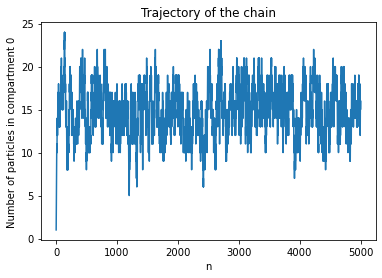

In [4]:
n_max = 5000
mu0 = np.zeros(K)
simulation = ehrenfest(n_max, K, mu0)
plt.plot(np.arange(0, n_max), simulation)
plt.xlabel('n')
plt.ylabel('Number of particles in compartment 0')
plt.title('Trajectory of the chain')
plt.show()

The initial state is 0. Then, the probability to choose a particle from compartment 1 is 1 because there is no particle in 0. So, in step 1, we have 1 particle in 0 and 29 in 1. As a consequence, in the following steps, the probability to choose a particle from compartment 1 is higher than the probability to choose a particle from 0. So the number of particles in 0 increases until 15. Then, the probability to choose a particle from 0 or 1 is close to 0.5. We observe that the number of particles in 0 oscillates around 15.

7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

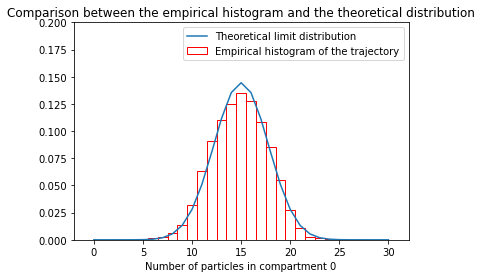

In [5]:
bins = [x + 0.5 for x in range(-1, K+1)]
plt.ylim([0, 0.2])
plt.hist(simulation, range = (0, K), bins = bins, density = True, color = 'white', edgecolor = 'red', label = 'Empirical histogram of the trajectory')
plt.plot(np.arange(0,K+1), pi, label = 'Theoretical limit distribution')
plt.xlabel('Number of particles in compartment 0')
plt.legend()
plt.title('Comparison between the empirical histogram and the theoretical distribution')
plt.show()

We notice that the empirical histogram fits the theoretical limit distribution. According to the central limit theorem, the theoretical distribution $\mathcal{B} (K, 1/2)$ tends to normal distribution as $K$ goes to infinity, and we effectively observe a gaussian curve for the histogram and the theoretical curve. 

8\. a) Modify the function defined in 1. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

The function ehrenfest_return_time(n_max, K, mu) is implemented in the file named "fonctions.py". 

8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

In [6]:
K_prime = 10
mu0_prime = np.zeros(K_prime)
nb_essai = 5
l = np.zeros(nb_essai)
for i in range(nb_essai):
    l[i] = ehrenfest_return_time(5000, K_prime, mu0_prime)
print('Empirical average return time to 0 :', round(np.mean(l), 3))
print('1/𝜋(0) =', 1/binom(K_prime, 1/2).pmf(np.arange(0, K_prime+1))[0])

Empirical average return time to 0 : 936.0
1/𝜋(0) = 1024.0


We notice that $T_{0,0}$ is close to 1 / $\pi(0)$. Indeed, in theory, we have E($T_{0,0}$) = 1 / $\pi(0)$ = $2^K$. In this case, E($T_{0,0}$) = 1 / $\pi(0)$ = $1024$

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

As K increases, the probability of numerically observing the chain returning to its initial chain tends to 0. Indeed, the average return time to 0 is in theory : E($T_{0,0}$) = 1 / $\pi(0)$ = $2^K$.

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu$ and transition matrix $P$

$$
     \mu = [0, 1, 0, 0, 0, 0], 
     %
     \quad
     %
     P = \begin{pmatrix}
       1/2   & 1/2 &0  &0   &0   &0   \\
	 	1/4 &0   &0  &1/4 &1/4 &1/4   \\
       1/2   &0   &0  &0   &0   &1/2 \\
       0   &1/2 &0  &0   &1/2 &0   \\
       0   &1/3 &0  &1/3 &0   &1/3 \\
       0   &1/3 &1/3  & 0 &1/3   &0
     \end{pmatrix}.
 $$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

The Markov chain $X$ is irreducible. Indeed, for i = 0,..., K, for j = 0,..., K, there is a cycle, with positive probability, that joins i and j, and j and i. Each state is reached an infinite number of times and there is an unique class of communication.

There is no absorbing state in the chain, the states set is finite and the chain is irreducible, so the chain is recurrent.

The chain is aperiodic.

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$;
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

The function simulate_dthmc(P, mu, n_max) is implemented in the file named "fonctions.py". 

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

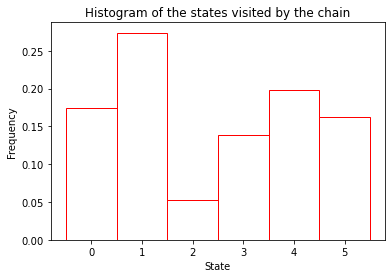

In [7]:
P =np.array(
    [[1/2, 1/2, 0, 0, 0, 0 ],
    [1/4, 0, 0, 1/4, 1/4, 1/4],
    [1/2, 0, 0, 0, 0, 1/2],
    [0, 1/2, 0, 0, 1/2, 0],
    [0,1/3, 0, 1/3, 0, 1/3],
    [0 , 1/3, 1/3, 0 ,1/3, 0]])

mu = np.array([0,1,0,0,0,0])

n_max = 2000
simulation_dthmc = simulate_dthmc(P, mu, n_max)
bins = [x + 0.5 for x in range(-1, 6)]
plt.hist(simulation_dthmc, range = (0, 6), bins = bins, density = True, color = 'white', edgecolor = 'red')
plt.title('Histogram of the states visited by the chain')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

In [8]:
la.eig(P.T)[0][0]

(1.0000000000000009+0j)

1 is an eigenvalue of $P^T$. We compute the associated eigenvector.

In [9]:
la.eig(P.T)[1][:,0]

array([-0.43437468+0.j, -0.62909436+0.j, -0.1198275 +0.j, -0.29956874+0.j,
       -0.42688546+0.j, -0.35948249+0.j])

We call $x$ this vector. We have, by definition of eigenvalue and eigenvector, $P^T x$ = $x$. This kind of vector is not unique : each vector $y = k x$ with $k$ a number (different from 0) is such as $P^T y$ = $y$. We choose a $\boldsymbol{\pi}$ vector such as the sum of its components is 1 :

In [10]:
pi1 = la.eig(P.T)[1][:,0]/np.sum(la.eig(P.T)[1][:,0])

We check the equality : $P^T \boldsymbol{\pi}$ = $\boldsymbol{\pi}$ :

In [11]:
abs(P.T@pi1 - pi1)<10e-10

array([ True,  True,  True,  True,  True,  True])

$\boldsymbol{\pi}$ is an invariant distribution of the chain.

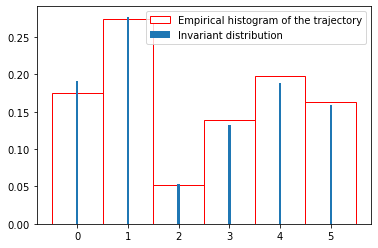

In [12]:
n_max = 2000
width = 0.05
bins = [x + 0.5 for x in range(-1, 6)]
plt.hist(simulation_dthmc, range = (0, 6), bins = bins, density = True, color = 'white', edgecolor = 'red', label = 'Empirical histogram of the trajectory')
plt.bar(x = range(0,6), height = abs(pi1), width = width, label = 'Invariant distribution')
plt.legend()
plt.show()

According to the figure, the distribution of the trajectory of the chain with a big number of time steps tends to the invariant distribution $\boldsymbol{\pi}$.

5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


In [13]:
n = 1000
mu_n = mu@la.matrix_power(P,n)

The limit of $\mu_n$ as $n$ goes to $+\infty$ is $\boldsymbol{\pi}$. We illustrate this result by checking that the difference between the components of each vector tends to 0 :

In [14]:
(mu_n-pi1)<10e-10

array([ True,  True,  True,  True,  True,  True])

5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 1, \dotsc , 6$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?
  

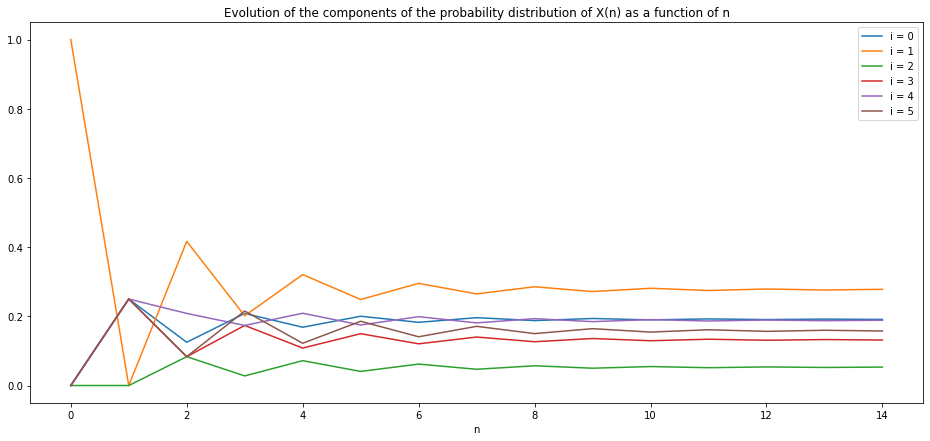

In [15]:
power_max = 15
mu_power = np.array([mu@la.matrix_power(P,i) for i in range (power_max)])
plt.figure(figsize = (16,7))
for k in range(6):
    plt.plot(np.arange(0,power_max), mu_power[:,k], label = 'i = ' + str(k))
plt.legend()
plt.xlabel('n')
plt.title('Evolution of the components of the probability distribution of X(n) as a function of n')
plt.show()

This curve illustrates the convergence of the probability distribution.

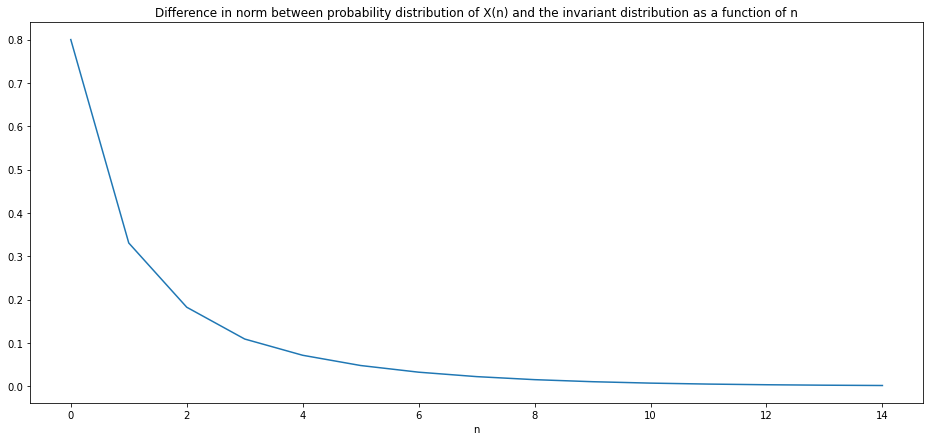

In [16]:
norm = np.zeros(len(mu_power))
for i in range (len(mu_power)):
    norm[i] = la.norm(mu_power[i]-pi1)
plt.figure(figsize = (16,7))
plt.plot(np.arange(0,len(mu_power)), norm)
plt.xlabel('n')
#plt.ylabel('Difference in norm between probability distribution of X(n) and the invariant distribution')
plt.title('Difference in norm between probability distribution of X(n) and the invariant distribution as a function of n')
plt.show()    

This curve illustrate that he limit of $\mu_n$ as $n$ goes to $+\infty$ is $\boldsymbol{\pi}$. Indeed, $n \mapsto \Vert \mu_n - \pi \Vert_1$ tends to 0 as $n$ goes to $+\infty$.

6\. For each state $i \in \{1, \dotsc, 5 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 

In [17]:
matrix_return_time = np.zeros((6,100))
average_return_time = np.zeros(6)
for i in range (len(matrix_return_time)):
        for j in range ((len(matrix_return_time[i]))):
            matrix_return_time[i,j] = simulate_dthmc_return_time(P, i, 2000)
        average_return_time[i]=np.mean(matrix_return_time[i,:])
            
theory_return_time = np.real(1/pi1)

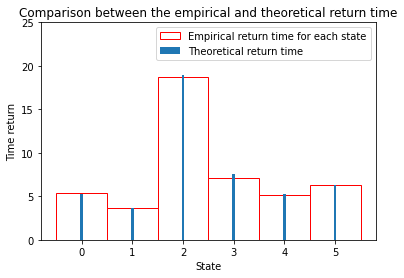

In [18]:
bins = [x + 0.5 for x in range(-1, 6)]
plt.bar(x = range(0,6), height = average_return_time, width = 1, color = 'white' , edgecolor = 'red', label = 'Empirical return time for each state')
plt.bar(x = range(0,6), height = theory_return_time, width = width, label = 'Theoretical return time')
plt.ylim([0, 25])
plt.title('Comparison between the empirical and theoretical return time')
plt.xlabel('State')
plt.ylabel('Time return')
plt.legend()
plt.show()

According to this bar chart, the empirical average return time calculated on 100 trajectories is close to the theoretical return time for each state i : $1/$$\boldsymbol{\pi}_i$.